In [ ]:
import torch
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
# ann(artificial neural network)
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], shuffle=True, cluster_std=0.3)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, centers=[[1, 1], [-1, -1], [1, -1], [-1, 1]], shuffle=True, cluster_std=0.3)

In [ ]:
def label_map(y_, from_, to_):
  y = np.copy(y_)
  for f in from_:
    y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

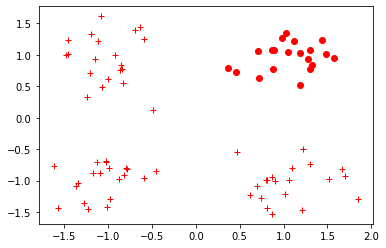

In [ ]:
def vis_data(x, y=None, c='r'):
  if y is None:
    y = [None] * len(x)
  
  for x_, y_ in zip(x, y):
    if y_ is None:
      plt.plot(x_[0], x_[1], '*', markerfacecolor='none', markeredgecolor=c)
    else:
      plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [ ]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)
print(x_train.shape)

torch.Size([80, 2])


In [ ]:
class NeuralNet(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.linear_1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid()
  
  def forward(self, input_tensor):
    linear1 = self.linear_1(input_tensor)
    relu = self.relu(linear1)
    linear2 = self.linear_2(relu)
    output = self.sigmoid(linear2)
    return output

In [ ]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.MSELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 1.8432748317718506


In [ ]:
for epoch in range(epochs):
  model.train()
  optimizer.zero_grad()
  train_output = model(x_train)
  train_loss = criterion(train_output.squeeze(), y_train)
  if epoch % 100 == 0:
    print('Train loss at {} is {}'.format(epoch, train_loss.item()))
  train_loss.backward()
  optimizer.step()

Train loss at 0 is 1.8438571691513062
Train loss at 100 is 1.2548044919967651
Train loss at 200 is 1.144402265548706
Train loss at 300 is 1.1021885871887207
Train loss at 400 is 1.071956992149353
Train loss at 500 is 1.0515931844711304
Train loss at 600 is 1.0386497974395752
Train loss at 700 is 1.0302627086639404
Train loss at 800 is 1.0245717763900757
Train loss at 900 is 1.0205308198928833
Train loss at 1000 is 1.0175437927246094
Train loss at 1100 is 1.0152661800384521
Train loss at 1200 is 1.0134871006011963
Train loss at 1300 is 1.0120518207550049
Train loss at 1400 is 1.0108712911605835
Train loss at 1500 is 1.009885549545288
Train loss at 1600 is 1.009049892425537
Train loss at 1700 is 1.0083335638046265
Train loss at 1800 is 1.0077134370803833
Train loss at 1900 is 1.007171392440796


In [ ]:
model.eval()
test_loss_after = criterion(model(x_test).squeeze(), y_test)
print('After Training, test loss is {}'.format(test_loss_after.item()))

After Training, test loss is 1.01137113571167


In [ ]:
torch.save(model.state_dict(), './model.pt')

In [ ]:
new_model = NeuralNet(2, 5)
new_model.load_state_dict(torch.load('./model.pt'))
new_model.eval()
print('Exist Model: ', new_model(torch.FloatTensor([-1, 1])).item())

Exist Model:  0.9990612864494324
